# Analyzing Declan Rice performance against Real Madrid

Declan Rice was absolutely dominant against Real Madrid in last season's quarterfinals, he was everywhere on the field leaving the defending champions mostly chasing his shadows. To capped it off, he also score two brilliantly taken free-kicks, showing the world why he is worth £100m.

Here, we will plot all of his actions against Real Madrid to show just how impactful his performance was.

In [1]:
# Import the required libraries

# Supabase is where the data is stored
import supabase
from supabase import create_client, Client

# Pandas to convert the supabase query to a dataframe
import pandas as pd

# These libraries help in adding visual elements in the data visualization (club crest and nation flags)
from PIL import Image
import urllib
import os

from mplsoccer import Pitch
import matplotlib.pyplot as plt
from matplotlib import font_manager

## Load the Data
Just like the clutch goals ranking, here we will also access Supabase for events data from the Real Madrid game.

In [2]:
# Access this season's data from Supabase
# Provide the URL and key to the Supabase project - store it in 'url' and 'key'
url = 'Your Supabase Project URL'
key = 'Your Supabase Project Key'

# Create a supabase client
supabase: Client = create_client(url, key)

In [3]:
# Get goals data from the 'match_events' table - only for Arsenal ('team_id' == 13)
response = supabase.table('match_events') \
    .select('*') \
    .eq('team_id', 13) \
    .eq('match_id', 1894555) \
    .eq('player_id', 332325) \
    .execute()

# Convert the data to a pandas dataframe
df_rice = pd.DataFrame(response.data)

# Preview the data
df_rice.head(10)

,id,match_id,event_id,minute,second,team_id,player_id,x,y,end_x,...,blocked_x,blocked_y,goal_mouth_z,goal_mouth_y,is_shot,card_type,is_goal,type_display_name,outcome_type_display_name,period_display_name
0,2798325401,1894555,3,0,7,13,332325,27.9,43.1,60.2,...,NaN,NaN,NaN,NaN,False,False,False,Pass,Unsuccessful,FirstHalf
1,2798328937,1894555,46,4,5,13,332325,29.3,94.4,18.0,...,NaN,NaN,NaN,NaN,False,False,False,Pass,Successful,FirstHalf
2,2798332961,1894555,77,7,50,13,332325,65.5,90.0,61.9,...,NaN,NaN,NaN,NaN,False,False,False,Pass,Successful,FirstHalf
3,2798333065,1894555,81,8,0,13,332325,95.9,72.2,93.3,...,NaN,NaN,NaN,NaN,False,False,False,Pass,Unsuccessful,FirstHalf
4,2798335081,1894555,104,9,56,13,332325,67.4,86.1,73.0,...,NaN,NaN,NaN,NaN,False,False,False,Pass,Successful,FirstHalf
5,2798337323,1894555,128,12,19,13,332325,58.1,77.6,74.2,...,NaN,NaN,NaN,NaN,False,False,False,Pass,Successful,FirstHalf
6,2798337353,1894555,130,12,25,13,332325,95.4,53.8,NaN,...,96.7,53.4,19.0,52.5,True,False,False,SavedShot,Successful,FirstHalf
7,2798343383,1894555,146,18,32,13,332325,89.3,90.6,84.8,...,NaN,NaN,NaN,NaN,False,False,False,Pass,Successful,FirstHalf
8,2798343465,1894555,149,18,38,13,332325,80.2,95.2,NaN,...,NaN,NaN,NaN,NaN,False,False,False,Foul,Unsuccessful,FirstHalf
9,2798344745,1894555,157,19,59,13,332325,74.0,66.2,68.9,...,NaN,NaN,NaN,NaN,False,False,False,Pass,Successful,FirstHalf


## Data Processing
We need to create a summary of Declan Rice's statistics, which we will then add to the visualization as an annotation.
We will also remove Rice being subbed off from the list of events as it should not count as a touch.

In [4]:
# Create a function to summarize Declan Rice's stats, which we will add to the visualization as an annotation.
def get_summary_stats(df):
    summary = {}

    # Passes
    passes = df[df['type_display_name'].isin(['Pass', 'BlockedPass'])] # Two different metrics according to Whoscored but we'll keep it as one
    summary['passes_attempted'] = len(passes)
    summary['passes_completed'] = len(passes[passes['outcome_type_display_name'] == 'Successful'])

    # Take Ons
    summary['take_ons'] = len(df[df['type_display_name'] == 'TakeOn'])
    
    # Shots
    shots = df[df['type_display_name'].isin(['Goal', 'SavedShot'])] # Track the amount of shots taken by Rice
    summary['shots_attempted'] = len(shots)

    # Defensive actions
    summary['challenges'] = len(df[df['type_display_name'] == 'Challenge'])
    summary['interceptions'] = len(df[df['type_display_name'] == 'Interception'])
    summary['fouls'] = len(df[df['type_display_name'] == 'Foul'])
    summary['aerial_duels'] = len(df[df['type_display_name'] == 'Aerial'])
    summary['clearances'] = len(df[df['type_display_name'] == 'Clearance'])

    return summary

In [5]:
# Apply the summary function
summary = get_summary_stats(df_rice)

In [6]:
# Remove the last event (Declan Rice subbed off)
df_rice.drop(index=df_rice.index[-1],axis=0,inplace=True)
# Check the dataframe
df_rice

,id,match_id,event_id,minute,second,team_id,player_id,x,y,end_x,...,blocked_x,blocked_y,goal_mouth_z,goal_mouth_y,is_shot,card_type,is_goal,type_display_name,outcome_type_display_name,period_display_name
0,2798325401,1894555,3,0,7,13,332325,27.9,43.1,60.2,...,NaN,NaN,NaN,NaN,False,False,False,Pass,Unsuccessful,FirstHalf
1,2798328937,1894555,46,4,5,13,332325,29.3,94.4,18.0,...,NaN,NaN,NaN,NaN,False,False,False,Pass,Successful,FirstHalf
2,2798332961,1894555,77,7,50,13,332325,65.5,90.0,61.9,...,NaN,NaN,NaN,NaN,False,False,False,Pass,Successful,FirstHalf
3,2798333065,1894555,81,8,0,13,332325,95.9,72.2,93.3,...,NaN,NaN,NaN,NaN,False,False,False,Pass,Unsuccessful,FirstHalf
4,2798335081,1894555,104,9,56,13,332325,67.4,86.1,73.0,...,NaN,NaN,NaN,NaN,False,False,False,Pass,Successful,FirstHalf
5,2798337323,1894555,128,12,19,13,332325,58.1,77.6,74.2,...,NaN,NaN,NaN,NaN,False,False,False,Pass,Successful,FirstHalf
6,2798337353,1894555,130,12,25,13,332325,95.4,53.8,NaN,...,96.7,53.4,19.0,52.5,True,False,False,SavedShot,Successful,FirstHalf
7,2798343383,1894555,146,18,32,13,332325,89.3,90.6,84.8,...,NaN,NaN,NaN,NaN,False,False,False,Pass,Successful,FirstHalf
8,2798343465,1894555,149,18,38,13,332325,80.2,95.2,NaN,...,NaN,NaN,NaN,NaN,False,False,False,Foul,Unsuccessful,FirstHalf
9,2798344745,1894555,157,19,59,13,332325,74.0,66.2,68.9,...,NaN,NaN,NaN,NaN,False,False,False,Pass,Successful,FirstHalf


In [7]:
# Check the actions that Rice commit and the count
df_rice['type_display_name'].value_counts()

type_display_name
Pass            33
SavedShot        3
BlockedPass      2
Goal             2
Foul             1
Interception     1
Aerial           1
Challenge        1
Clearance        1
TakeOn           1
Name: count, dtype: int64

## Data Visualization
Now that the dataframe is ready, we can plot all of Declan Rice's actions

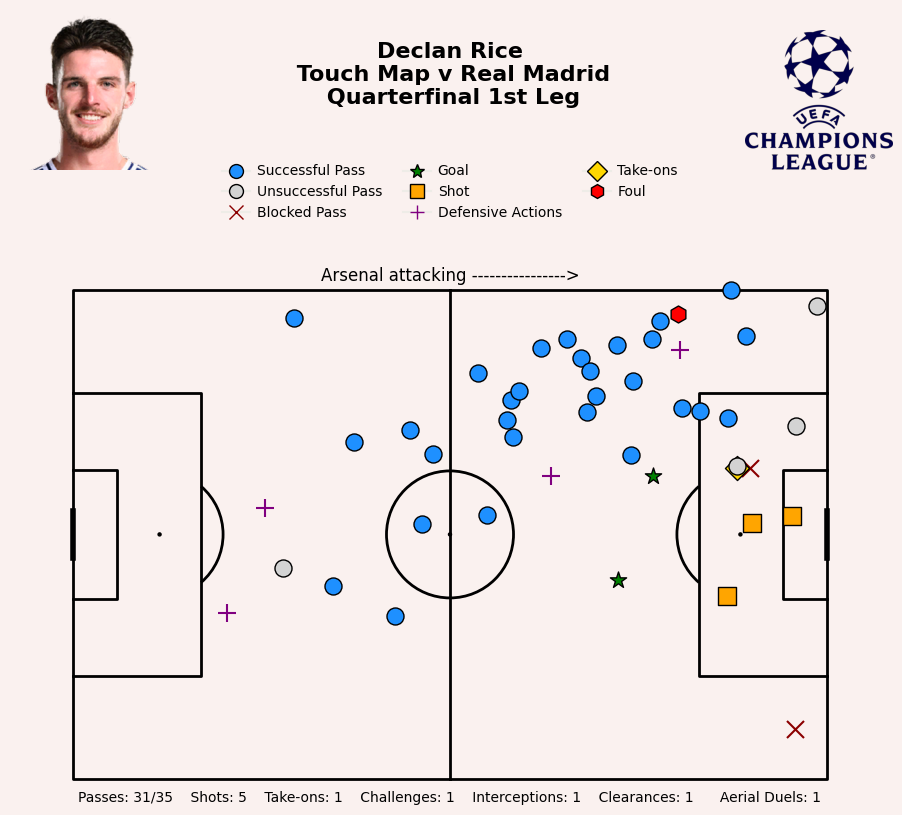

In [8]:
# Set the font
#font_path = '/Users/jasonrobert/Downloads/Arvo/Arvo-Regular.ttf'
#font_props = font_manager.FontProperties(fname=font_path)

# Initialize pitch
pitch = Pitch(pitch_type='opta', pitch_color='#FAF1EF', line_color='black')
fig, ax = pitch.draw(figsize=(12, 8))
fig.subplots_adjust(top=0.83)
fig.patch.set_facecolor('#FAF1EF')
ax.set_facecolor('#FAF1EF')

# Arsenal attacking direction annotation
ax.annotate(
    'Arsenal attacking ---------------->',
    xy=(50, 101), xycoords='data',
    ha='center', va='bottom',
    fontsize=12, #fontproperties=font_props
)

# Define styles for each event type and outcome
style_map = {
    'Pass':          {'Successful': ('dodgerblue', 'o'), 'Unsuccessful': ('lightgrey', 'o')},
    'BlockedPass':   {'Successful': ('darkred', 'x')},
    'Goal':          {'Successful': ('green', '*')},
    'SavedShot':     {'Successful': ('orange', 's')},
    'Interception':  {'any': ('purple', '+')},
    'Aerial':        {'any': ('purple', '+')},
    'Challenge':     {'any': ('purple', '+')},
    'Clearance':     {'any': ('purple', '+')},
    'TakeOn':        {'any': ('gold', 'D')},
}

# Plot each events
for _, row in df_rice.iterrows():
    event = row['type_display_name']
    # Use 'Successful' as a fallback if outcome is missing (e.g., for clearances, etc.)
    outcome = row.get('outcome_type_display_name', 'Successful')

    # Default style for unmapped events
    color, marker = ('red', 'h') # Using a hexagon for unmapped events

    if event in style_map:
        outcome_styles = style_map[event]
        if outcome in outcome_styles:
            color, marker = outcome_styles[outcome]
        elif 'any' in outcome_styles:
            color, marker = outcome_styles['any']

    # Plot the individual event using the style variables
    pitch.scatter(
        x=row['x'],
        y=row['y'],
        ax=ax,
        c=color,
        s=150,
        marker=marker,
        edgecolors='black'
    )

# Add summary annotation at the bottom
summary_text = (
    f"Passes: {summary['passes_completed']}/{summary['passes_attempted']}    "
    f"Shots: {summary['shots_attempted']}    "
    f"Take-ons: {summary['take_ons']}    "
    f"Challenges: {summary['challenges']}    "
    f"Interceptions: {summary['interceptions']}    "
    f"Clearances: {summary['clearances']}      "
    f"Aerial Duels: {summary['aerial_duels']}"
)
fig.text(0.5, 0.03, summary_text, ha='center', fontsize=10)

# Add legends for each actions
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='#EEECE7', label='Successful Pass', 
               markerfacecolor='dodgerblue', markersize=10, markeredgecolor='black'),
    plt.Line2D([0], [0], marker='o', color='#EEECE7', label='Unsuccessful Pass', 
               markerfacecolor='lightgrey', markersize=10, markeredgecolor='black'),
    plt.Line2D([0], [0], marker='x', color='#EEECE7', label='Blocked Pass', 
               markerfacecolor='darkred', markersize=10, markeredgecolor='darkred'),
    plt.Line2D([0], [0], marker='*', color='#EEECE7', label='Goal', 
               markerfacecolor='green', markersize=10, markeredgecolor='black'),
    plt.Line2D([0], [0], marker='s', color='#EEECE7', label='Shot', 
               markerfacecolor='orange', markersize=10, markeredgecolor='black'),
    plt.Line2D([0], [0], marker='+', color='#EEECE7', label='Defensive Actions', 
               markerfacecolor='purple', markersize=10, markeredgecolor='purple'),
    plt.Line2D([0], [0], marker='D', color='#EEECE7', label='Take-ons', 
               markerfacecolor='gold', markersize=10, markeredgecolor='black'),
    plt.Line2D([0], [0], marker='h', color='#EEECE7', label='Foul', 
               markerfacecolor='red', markersize=10, markeredgecolor='black')
]
ax.legend(
    handles=legend_elements,
    loc='upper center',
    bbox_to_anchor=(0.5, 1.225),
    ncol=3,
    fontsize=10,
    frameon=False,
    handletextpad=0.5,
    columnspacing=1.5
)

# Title
fig.suptitle("Declan Rice\n Touch Map v Real Madrid\n Quarterfinal 1st Leg", fontsize=16, weight='bold')

# Add player image
img_rice = Image.open('/Users/jasonrobert/Downloads/declan_rice.png')
ax_img_rice = fig.add_axes([0.1, 0.82, 0.2, 0.2])
ax_img_rice.imshow(img_rice)
ax_img_rice.axis('off')

# Add UCL logo
img_ucl = Image.open('/Users/jasonrobert/Downloads/ucl_logo.png')
ax_img_ucl = fig.add_axes([0.72, 0.82, 0.175, 0.175])
ax_img_ucl.imshow(img_ucl)
ax_img_ucl.axis('off')

plt.tight_layout(pad=2)
plt.show()

In [9]:
# Save the touch map to a PNG file
fig.savefig('visuals/rice_touchmap.png', dpi=300, bbox_inches='tight')

## Summary and take aways
Declan Rice joined Arsenal and was initially earmarked as a number 6, someone that will shield the defense ostensibly a holding midfielder. But in his second season with Arsenal, Rice has showed a different side to his game. Playing in the left eight role, Rice contributed to Arsenal's build up down the left side. He also did not shy away from his defensive duties showed by four defensive actions in the map above.

Last but not least, with five attempts and two wonderful free-kick goals, Rice displayed why he is the complete box-to-box midfielder.